In [ ]:
#@title 文字列の出力

print("Hello")

Hello


# NumPy

In [ ]:
#@title インポート

import numpy as np

In [ ]:
#@title broadcast

a = np.array([1, 2, 3])
b = 2
c = a + b

print("c", c)

c [3 4 5]


# SciPy

In [ ]:
#@title 信号処理

# 高速フーリエ変換
import numpy as np
from scipy import fftpack

np.random.seed(1234)

time_step = 0.02
period = 5
time_vec = np.arange(0, 20, time_step)

# ノイズを含んだsin波の生成
sig = np.sin(2 * np.pi / period * time_vec) + 0.5 * np.random.randn(time_vec.size)

# 離散フーリエ変換の周波数サンプルポイントを取得
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# 離散フーリエ変換
sig_fft = fftpack.fft(sig)

# 0より大きい周波数成分のインデックスを取得
pidxs = np.where(sample_freq > 0)

# 周波数成分とパワースペクトル（振幅の絶対値）を取得
freqs, power = sample_freq[pidxs], np.abs(sig_fft)[pidxs]

# 信号の主要な周波数成分を特定
freq = freqs[power.argmax()]

print("周期", 1/freq)
print("サンプルポイントの数", time_vec.size)

周期 5.0
サンプルポイントの数 1000


# Pandas

In [ ]:
#@title pickleを用いた保存例

import pandas as pd
import pickle

# DataFrameの作成
data = {'名前': ['太郎', '花子', '次郎'],
        '年齢': [25, 30, 22]}
df = pd.DataFrame(data)

# DataFrameをpickleファイルに保存
with open('dataframe.pkl', 'wb') as file:
    pickle.dump(df, file)

# pickleファイルからDataFrameを読み込み
with open('dataframe.pkl', 'rb') as file:
    loaded_df = pickle.load(file)

print(loaded_df)

   名前  年齢
0  太郎  25
1  花子  30
2  次郎  22


# Matplotlib

In [ ]:
#@title ライブラリのインポート

import matplotlib.pyplot as plt
import numpy as np

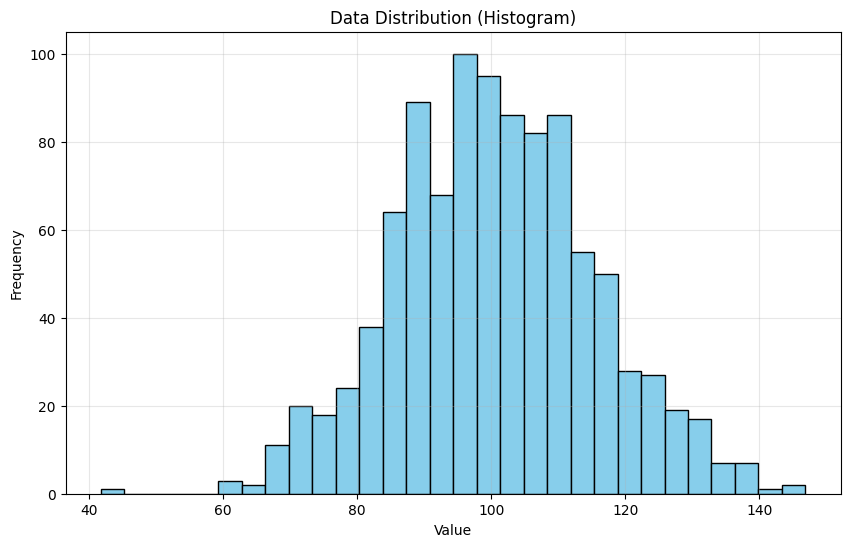

In [ ]:
#@title ヒストグラム

# ランダムなデータの生成
data = np.random.normal(100, 15, 1000)  # 平均100、標準偏差15の正規分布データ1000個

# ヒストグラムの作成
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.hist(data, bins=30, color='skyblue', edgecolor='black')  # ヒストグラムを描画
plt.title('Data Distribution (Histogram)')  # タイトルの設定
plt.xlabel('Value')  # x軸のラベル
plt.ylabel('Frequency')  # y軸のラベル
plt.grid(True, alpha=0.3)  # グリッドの表示
plt.show()

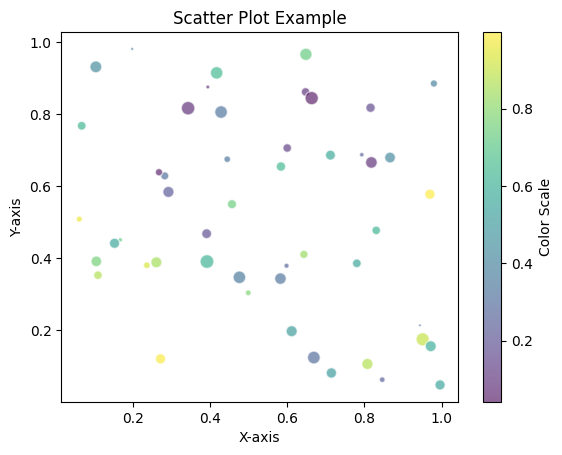

In [ ]:
#@title 散布図

x = np.random.rand(50)  # x軸のデータ
y = np.random.rand(50)  # y軸のデータ
sizes = 100 * np.random.rand(50)  # 点のサイズ
colors = np.random.rand(50)       # 点の色

# 散布図を描画
plt.scatter(x, y, s=sizes, c=colors, cmap='viridis', alpha=0.6, edgecolors='w')

# グラフのタイトルとラベル
plt.title('Scatter Plot Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# カラーバーの追加
plt.colorbar(label='Color Scale')

# グラフの表示
plt.show()

<ipython-input-9-39e354575d51>:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data1, data2, data3], labels=['Group 1', 'Group 2', 'Group 3'])


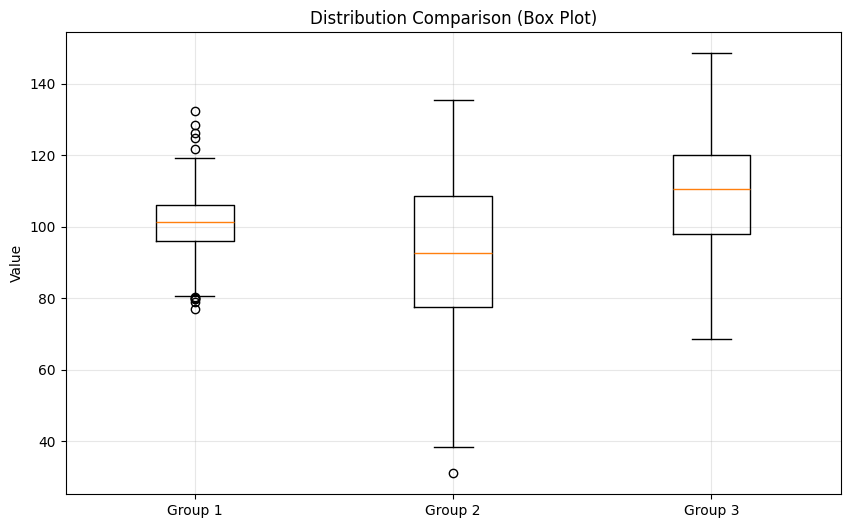

In [ ]:
#@title 箱ひげ図

# 3つのグループのデータを生成
data1 = np.random.normal(100, 10, 200)
data2 = np.random.normal(90, 20, 200)
data3 = np.random.normal(110, 15, 200)

# 箱ひげ図の作成
plt.figure(figsize=(10, 6))
plt.boxplot([data1, data2, data3], labels=['Group 1', 'Group 2', 'Group 3'])
plt.title('Distribution Comparison (Box Plot)')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)
plt.show()

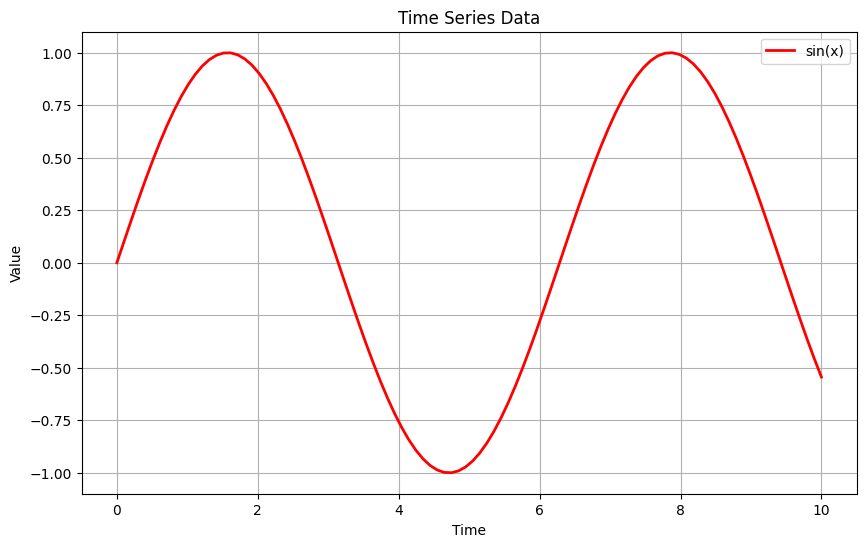

In [ ]:
#@title 折れ線グラフ

# 時系列データの生成
x = np.linspace(0, 10, 100)  # 0から10までの100点
y = np.sin(x)  # サイン波の生成

# 折れ線グラフの作成
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='red', linewidth=2, linestyle='-', label='sin(x)')
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()  # 凡例の表示
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

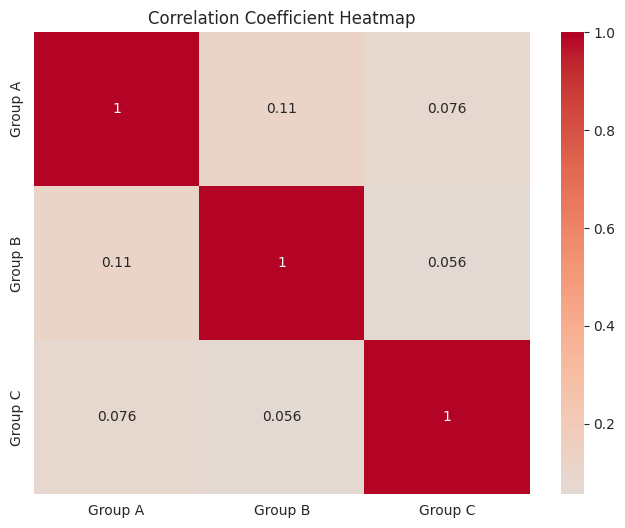

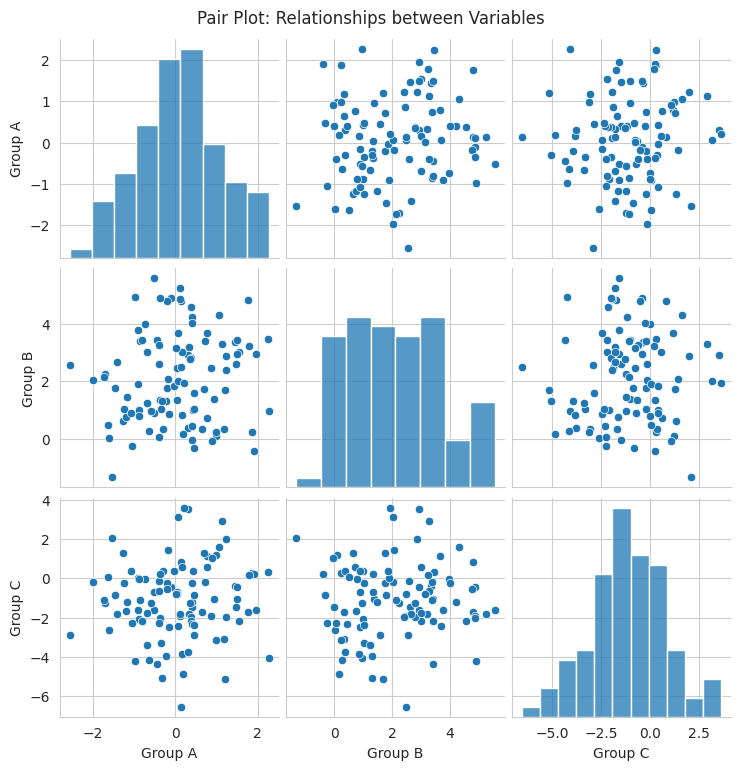

In [ ]:
#@title seaborn（ヒートマップ、ペアプロット）

import seaborn as sns

# サンプルデータの作成
np.random.seed(0)
data = pd.DataFrame({
    'Group A': np.random.normal(0, 1, 100),
    'Group B': np.random.normal(2, 1.5, 100),
    'Group C': np.random.normal(-1, 2, 100)
})

# seabornのスタイル設定
sns.set_style("whitegrid")  # グリッド付きの白背景スタイル
plt.figure(figsize=(12, 6))

# 相関関係を示すヒートマップ
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Coefficient Heatmap')
plt.show()

# 散布図行列（複数の変数の関係性を一度に確認）
sns.pairplot(data)
plt.suptitle('Pair Plot: Relationships between Variables', y=1.02)
plt.show()

# Scikit-Learnを使った機械学習


In [ ]:
#@title ライブラリのインストール

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [ ]:
#@title データセットの準備

X, y = load_iris(return_X_y=True)

print("説明変数")
print(X[:10])

print("目的変数")
print(y[:120])

説明変数
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
目的変数
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


In [ ]:
#@title 機械学習モデルの学習

clf = LogisticRegression(max_iter=120, random_state=0).fit(X, y)

In [ ]:
#@title 機械学習モデルによる推論

r = clf.predict(X[40:80, :])
print("推論", r)
print("正解", y[40:80])

推論 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 2 1 1]
正解 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [ ]:
#@title 推論結果が各クラスに属する確率

clf.predict_proba(X[40:80, :])

array([[9.86443969e-01, 1.35560195e-02, 1.14202860e-08],
       [9.61668742e-01, 3.83311922e-02, 6.59007227e-08],
       [9.88914832e-01, 1.10851563e-02, 1.12765704e-08],
       [9.72157866e-01, 2.78419960e-02, 1.37612773e-07],
       [9.60022864e-01, 3.99769125e-02, 2.23552543e-07],
       [9.73526087e-01, 2.64738732e-02, 4.00283517e-08],
       [9.80140300e-01, 1.98596749e-02, 2.54684732e-08],
       [9.83179456e-01, 1.68205243e-02, 2.01560531e-08],
       [9.78312306e-01, 2.16876755e-02, 1.88351242e-08],
       [9.78393934e-01, 2.16060468e-02, 1.93532255e-08],
       [2.12359394e-03, 8.74078190e-01, 1.23798216e-01],
       [5.81426728e-03, 8.59812312e-01, 1.34373421e-01],
       [1.05986891e-03, 7.25257925e-01, 2.73682206e-01],
       [1.54315337e-02, 9.39642319e-01, 4.49261477e-02],
       [2.37587091e-03, 8.15276987e-01, 1.82347142e-01],
       [6.99746474e-03, 8.60065520e-01, 1.32937015e-01],
       [3.77086537e-03, 7.16622834e-01, 2.79606300e-01],
       [1.47997197e-01, 8.48946

# PyTorch

In [ ]:
#@title ライブラリのインストール

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
#@title GPU利用有無の確認

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [ ]:
#@title ニューラルネットワークの定義

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(in_features=28*28, out_features=20)
        self.layer2 = nn.Linear(in_features=20, out_features=20)
        self.layer3 = nn.Linear(in_features=20, out_features=10)

    def forward(self, x):
        x = self.flatten(x)
        hidden1 = self.layer1(x)
        print(f"hidden1 Before ReLU: {hidden1}\n\n")
        hidden1 = nn.ReLU()(hidden1)
        print(f"hidden1 After ReLU: {hidden1}\n\n")
        hidden2 = self.layer2(hidden1)
        print(f"hidden2 Before ReLU: {hidden2}\n\n")
        hidden2 = nn.ReLU()(hidden2)
        print(f"hidden2 After ReLU: {hidden2}\n\n")
        logits = self.layer3(hidden2)
        return logits

In [ ]:
#@title ニューラルネットワーク構造の確認

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=784, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=20, bias=True)
  (layer3): Linear(in_features=20, out_features=10, bias=True)
)


In [ ]:
#@title ニューラルネットワークによる推論

X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

hidden1 Before ReLU: tensor([[ 0.3148, -0.5992,  0.1611, -0.3744,  0.1105, -0.3616,  0.1590, -0.2450,
         -0.0240, -0.1399,  0.0820,  0.0778, -0.1189,  0.0318,  0.0102,  0.0488,
          0.3072, -0.3541,  0.0817, -0.0953]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


hidden1 After ReLU: tensor([[0.3148, 0.0000, 0.1611, 0.0000, 0.1105, 0.0000, 0.1590, 0.0000, 0.0000,
         0.0000, 0.0820, 0.0778, 0.0000, 0.0318, 0.0102, 0.0488, 0.3072, 0.0000,
         0.0817, 0.0000]], device='cuda:0', grad_fn=<ReluBackward0>)


hidden2 Before ReLU: tensor([[ 0.1279, -0.0212, -0.1514,  0.0277, -0.0874, -0.1415, -0.2115,  0.0705,
          0.1131,  0.1034,  0.0108, -0.1899, -0.3065, -0.1173,  0.1081, -0.0132,
         -0.0401, -0.0035,  0.1613, -0.0729]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


hidden2 After ReLU: tensor([[0.1279, 0.0000, 0.0000, 0.0277, 0.0000, 0.0000, 0.0000, 0.0705, 0.1131,
         0.1034, 0.0108, 0.0000, 0.0000, 0.0000, 0.1081, 0.0000, 0.0000, 0.0000,
 